In [30]:
import numpy as np
import pandas as pd
import re

In [32]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [34]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [36]:
df.duplicated().sum()

122

In [38]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,dlf regal gardens,sector 90,1.3,7150.0,1818.0,Super Built up area 1818(168.9 sq.m.)Built Up area: 1700 sq.ft. (157.94 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,3,3+,not available,7.0,South,1 to 5 Year Old,"['SS Omnia, Sector 86', 'Numberdar market, IMT Manesar', ""Sodhi's Supermarket, Sector 82"", 'RPS International School', 'RHM Public School', 'ICICI Bank ATM, Sector 86', 'Silver Streak Multi Speciality', 'Aarvy Healthcare Super Speciality', 'Miracles Apollo Cradle Hospital', 'HDFC Bank, Pataudi Rd', 'Canara Bank - Nawada Fatehpur', 'State Bank of India', 'Minda Industries Nawada Fatehpur', 'Holiday Inn Gurugram Sector 90', 'M3M SCO Shop cum Office']",NaN,"['Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


## 1. areaWithType

In [41]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
2601,0.65,596.0,Super Built up area 650(60.39 sq.m.)Carpet area: 596 sq.ft. (55.37 sq.m.)
1619,2.65,2554.0,Super Built up area 2554(237.27 sq.m.)
1469,1.00,1537.0,Carpet area: 1537 (142.79 sq.m.)
2657,2.45,2132.0,Super Built up area 2132(198.07 sq.m.)Built Up area: 1800 sq.ft. (167.23 sq.m.)Carpet area: 1500 sq.ft. (139.35 sq.m.)
744,6.50,3390.0,Super Built up area 3390(314.94 sq.m.)Built Up area: 3000 sq.ft. (278.71 sq.m.)Carpet area: 2500 sq.ft. (232.26 sq.m.)


In [43]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [45]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [47]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [49]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [53]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
976,11.50,house,6500.0,Plot area 3762(349.5 sq.m.)Built Up area: 9000 sq.ft. (836.13 sq.m.)Carpet area: 6500 sq.ft. (603.87 sq.m.),NaN,9000.00,6500.00
1246,0.33,flat,844.0,Super Built up area 767(71.26 sq.m.),767.0,NaN,NaN
1425,0.40,flat,595.0,Carpet area: 595 (55.28 sq.m.),NaN,NaN,595.00
1636,1.20,flat,1758.0,Super Built up area 1758(163.32 sq.m.)Built Up area: 1275.53 sq.ft. (118.5 sq.m.)Carpet area: 974.68 sq.ft. (90.55 sq.m.),1758.0,1275.53,974.68
3460,1.20,flat,1423.0,Carpet area: 1423 (132.2 sq.m.),NaN,NaN,1423.00


In [55]:
df.duplicated().sum()

122

In [57]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [59]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
8,4.49,house,1836.0,Plot area 204(170.57 sq.m.),NaN,NaN,NaN
11,3.55,house,1449.0,Plot area 161(134.62 sq.m.),NaN,NaN,NaN
26,9.25,house,2340.0,Plot area 265(221.57 sq.m.)Built Up area: 262 sq.yards (219.07 sq.m.)Carpet area: 260 sq.yards (217.39 sq.m.),NaN,262.0,260.0
39,6.80,house,2160.0,Plot area 240(200.67 sq.m.)Built Up area: 220 sq.yards (183.95 sq.m.)Carpet area: 200 sq.yards (167.23 sq.m.),NaN,220.0,200.0
40,2.45,house,3159.0,Plot area 60(50.17 sq.m.)Built Up area: 540 sq.yards (451.51 sq.m.)Carpet area: 351 sq.yards (293.48 sq.m.),NaN,540.0,351.0


In [61]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [63]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [65]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
8,4.49,house,1836.0,Plot area 204(170.57 sq.m.),NaN,NaN,NaN
11,3.55,house,1449.0,Plot area 161(134.62 sq.m.),NaN,NaN,NaN
49,6.75,house,232.0,Plot area 232(21.55 sq.m.),NaN,NaN,NaN
55,8.40,house,2430.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN
63,7.00,house,2160.0,Plot area 240(200.67 sq.m.),NaN,NaN,NaN


In [67]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [69]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [71]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [73]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
8,4.49,house,1836.0,Plot area 204(170.57 sq.m.),NaN,204.00,NaN
11,3.55,house,1449.0,Plot area 161(134.62 sq.m.),NaN,161.00,NaN
49,6.75,house,232.0,Plot area 232(21.55 sq.m.),NaN,232.00,NaN
55,8.40,house,2430.0,Plot area 270(225.75 sq.m.),NaN,270.00,NaN
63,7.00,house,2160.0,Plot area 240(200.67 sq.m.),NaN,240.00,NaN
64,7.25,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
65,9.00,house,3159.0,Plot area 351(293.48 sq.m.),NaN,351.00,NaN
68,1.55,house,1116.0,Plot area 120(100.34 sq.m.),NaN,120.00,NaN
69,2.50,house,963.0,Plot area 107(89.47 sq.m.),NaN,107.00,NaN
75,4.50,house,1350.0,Plot area 150(125.42 sq.m.),NaN,150.00,NaN


In [75]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [77]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [79]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
8,4.49,house,1836.0,Plot area 204(170.57 sq.m.),NaN,1836.00,NaN
11,3.55,house,1449.0,Plot area 161(134.62 sq.m.),NaN,1449.00,NaN
49,6.75,house,232.0,Plot area 232(21.55 sq.m.),NaN,232.00,NaN
55,8.40,house,2430.0,Plot area 270(225.75 sq.m.),NaN,2430.00,NaN
63,7.00,house,2160.0,Plot area 240(200.67 sq.m.),NaN,2160.00,NaN
64,7.25,house,2700.0,Plot area 300(250.84 sq.m.),NaN,2700.00,NaN
65,9.00,house,3159.0,Plot area 351(293.48 sq.m.),NaN,3159.00,NaN
68,1.55,house,1116.0,Plot area 120(100.34 sq.m.),NaN,1080.00,NaN
69,2.50,house,963.0,Plot area 107(89.47 sq.m.),NaN,963.00,NaN
75,4.50,house,1350.0,Plot area 150(125.42 sq.m.),NaN,1350.00,NaN


In [81]:
# update the original dataframe
df.update(all_nan_df)

In [83]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [87]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,dlf regal gardens,sector 90,1.30,7150.0,1818.0,Super Built up area 1818(168.9 sq.m.)Built Up area: 1700 sq.ft. (157.94 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,3,3+,not available,7.0,South,1 to 5 Year Old,"['SS Omnia, Sector 86', 'Numberdar market, IMT Manesar', ""Sodhi's Supermarket, Sector 82"", 'RPS International School', 'RHM Public School', 'ICICI Bank ATM, Sector 86', 'Silver Streak Multi Speciality', 'Aarvy Healthcare Super Speciality', 'Miracles Apollo Cradle Hospital', 'HDFC Bank, Pataudi Rd', 'Canara Bank - Nawada Fatehpur', 'State Bank of India', 'Minda Industries Nawada Fatehpur', 'Holiday Inn Gurugram Sector 90', 'M3M SCO Shop cum Office']",NaN,"['Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1818.0,1700.0,1400.0
1,flat,tata primanti,sector 72,3.25,10545.0,3082.0,Super Built up area 3300(306.58 sq.m.),3,3,3,servant room,2.0,South,5 to 10 Year Old,"['Sector 55-56 Metro Station', 'Omaxe City Centre', 'Sohna Gurgaon Road', 'Faridabad Gurgaon Road', 'Pallavan PreSchool, Sohna Road', 'RBSM Public school', 'Polaris Hospital', 'Spaze Itech Park', 'Radisson Hotel Gurugram Sohna Road', 'SkyJumper Trampoline Park Gurgaon']",NaN,"['Centrally Air Conditioned', 'High Ceiling Height', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Swimming Pool', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",3300.0,NaN,NaN
2,flat,ramprastha the edge towers,sector 37d,0.80,5797.0,1380.0,Super Built up area 1380(128.21 sq.m.)Built Up area: 1300 sq.ft. (120.77 sq.m.)Carpet area: 1200 sq.ft. (111.48 sq.m.),2,2,3,not available,2.0,North-East,1 to 5 Year Old,"['MDS Public School', 'St Pauls School', 'Suncity School', 'Hanuman & Shani Mandir', 'IndusInd Bank ATM', 'SGT UHTC Basai', 'K.D. Hospital', 'CANARA BANK', 'State Bank of India', 'Basai Enclave Park', 'Ramprastha Police Post', 'Taxila cricket ground', 'Bharat Singh fuel company', 'Edge towers tennis court', 'KFG Sports Club']","['5 Fan', '2 Geyser', '7 Light', '2 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'No open drainage around', 'Recently Renovated', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting']",1380.0,1300.0,1200.0
3,flat,m3m golf hills phase 1,sector 79,1.70,10828.0,1570.0,Built Up area: 1570 (145.86 sq.m.)Carpet area: 1099 sq.ft. (102.1 sq.m.),3,2,3,not available,10.0,NaN,undefined,"['Petrol Pump Indian Oil', 'Petrol Pump', 'Rao Dhaba', ""McDonald's""]","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,1570.0,1099.0
4,flat,ss the leaf,sector 85,1.12,6453.0,1736.0,Su

## 2.additionalRoom

In [90]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,st

In [92]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [94]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1484,not available,0,0,0,0,0
1139,others,0,0,0,0,1
2886,not available,0,0,0,0,0
2003,not available,0,0,0,0,0
3608,"pooja room,study room,servant room,store room",1,1,1,1,0


In [96]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,dlf regal gardens,sector 90,1.30,7150.0,1818.0,Super Built up area 1818(168.9 sq.m.)Built Up area: 1700 sq.ft. (157.94 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,3,3+,not available,7.0,South,1 to 5 Year Old,"['SS Omnia, Sector 86', 'Numberdar market, IMT Manesar', ""Sodhi's Supermarket, Sector 82"", 'RPS International School', 'RHM Public School', 'ICICI Bank ATM, Sector 86', 'Silver Streak Multi Speciality', 'Aarvy Healthcare Super Speciality', 'Miracles Apollo Cradle Hospital', 'HDFC Bank, Pataudi Rd', 'Canara Bank - Nawada Fatehpur', 'State Bank of India', 'Minda Industries Nawada Fatehpur', 'Holiday Inn Gurugram Sector 90', 'M3M SCO Shop cum Office']",NaN,"['Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1818.0,1700.0,1400.0,0,0,0,0,0
1,flat,tata primanti,sector 72,3.25,10545.0,3082.0,Super Built up area 3300(306.58 sq.m.),3,3,3,servant room,2.0,South,5 to 10 Year Old,"['Sector 55-56 Metro Station', 'Omaxe City Centre', 'Sohna Gurgaon Road', 'Faridabad Gurgaon Road', 'Pallavan PreSchool, Sohna Road', 'RBSM Public school', 'Polaris Hospital', 'Spaze Itech Park', 'Radisson Hotel Gurugram Sohna Road', 'SkyJumper Trampoline Park Gurgaon']",NaN,"['Centrally Air Conditioned', 'High Ceiling Height', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Swimming Pool', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",3300.0,NaN,NaN,0,1,0,0,0
2,flat,ramprastha the edge towers,sector 37d,0.80,5797.0,1380.0,Super Built up area 1380(128.21 sq.m.)Built Up area: 1300 sq.ft. (120.77 sq.m.)Carpet area: 1200 sq.ft. (111.48 sq.m.),2,2,3,not available,2.0,North-East,1 to 5 Year Old,"['MDS Public School', 'St Pauls School', 'Suncity School', 'Hanuman & Shani Mandir', 'IndusInd Bank ATM', 'SGT UHTC Basai', 'K.D. Hospital', 'CANARA BANK', 'State Bank of India', 'Basai Enclave Park', 'Ramprastha Police Post', 'Taxila cricket ground', 'Bharat Singh fuel company', 'Edge towers tennis court', 'KFG Sports Club']","['5 Fan', '2 Geyser', '7 Light', '2 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'No open drainage around', 'Recently Renovated', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting']",1380.0,1300.0,1200.0,0,0,0,0,0
3,flat,m3m golf hills phase 1,sector 79,1.70,10828.0,1570.0,Built Up area: 1570 (145.86 sq.m.)Carpet area: 1099 sq.ft. (102.1 sq.m.),3,2,3,not available,10.0,NaN,undefined,"['Petrol Pump Indian Oil', 'Petrol Pump', 'Rao Dhaba', ""McDonald's""]","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water P

## 3.agePossession

In [99]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Aug 2023                 7
Jun 2024                 7
Dec 2025                 7
Nov 2023                 5
By 2025                  4
Aug 2024                 4
Oct 2023                 4
Sep 2023                 4
Jul 2024                 4
Feb 2024                 3
May 2024                 3
Nov 2024                 3
Jan 2025                 3
Jan 2026                 2
Apr 2026                 2
By 2027                  2
Aug 2025                 2
Oct 2025                 2
Mar 2025                 2
Jul 2025                 2
Jul 2027                 2
Jun 2027      

In [101]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [103]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [105]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [107]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,dlf regal gardens,sector 90,1.30,7150.0,1818.0,Super Built up area 1818(168.9 sq.m.)Built Up area: 1700 sq.ft. (157.94 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,3,3+,not available,7.0,South,Relatively New,"['SS Omnia, Sector 86', 'Numberdar market, IMT Manesar', ""Sodhi's Supermarket, Sector 82"", 'RPS International School', 'RHM Public School', 'ICICI Bank ATM, Sector 86', 'Silver Streak Multi Speciality', 'Aarvy Healthcare Super Speciality', 'Miracles Apollo Cradle Hospital', 'HDFC Bank, Pataudi Rd', 'Canara Bank - Nawada Fatehpur', 'State Bank of India', 'Minda Industries Nawada Fatehpur', 'Holiday Inn Gurugram Sector 90', 'M3M SCO Shop cum Office']",NaN,"['Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1818.0,1700.0,1400.0,0,0,0,0,0
1,flat,tata primanti,sector 72,3.25,10545.0,3082.0,Super Built up area 3300(306.58 sq.m.),3,3,3,servant room,2.0,South,Moderately Old,"['Sector 55-56 Metro Station', 'Omaxe City Centre', 'Sohna Gurgaon Road', 'Faridabad Gurgaon Road', 'Pallavan PreSchool, Sohna Road', 'RBSM Public school', 'Polaris Hospital', 'Spaze Itech Park', 'Radisson Hotel Gurugram Sohna Road', 'SkyJumper Trampoline Park Gurgaon']",NaN,"['Centrally Air Conditioned', 'High Ceiling Height', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Swimming Pool', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",3300.0,NaN,NaN,0,1,0,0,0
2,flat,ramprastha the edge towers,sector 37d,0.80,5797.0,1380.0,Super Built up area 1380(128.21 sq.m.)Built Up area: 1300 sq.ft. (120.77 sq.m.)Carpet area: 1200 sq.ft. (111.48 sq.m.),2,2,3,not available,2.0,North-East,Relatively New,"['MDS Public School', 'St Pauls School', 'Suncity School', 'Hanuman & Shani Mandir', 'IndusInd Bank ATM', 'SGT UHTC Basai', 'K.D. Hospital', 'CANARA BANK', 'State Bank of India', 'Basai Enclave Park', 'Ramprastha Police Post', 'Taxila cricket ground', 'Bharat Singh fuel company', 'Edge towers tennis court', 'KFG Sports Club']","['5 Fan', '2 Geyser', '7 Light', '2 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'No open drainage around', 'Recently Renovated', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting']",1380.0,1300.0,1200.0,0,0,0,0,0
3,flat,m3m golf hills phase 1,sector 79,1.70,10828.0,1570.0,Built Up area: 1570 (145.86 sq.m.)Carpet area: 1099 sq.ft. (102.1 sq.m.),3,2,3,not available,10.0,NaN,Undefined,"['Petrol Pump Indian Oil', 'Petrol Pump', 'Rao Dhaba', ""McDonald's""]","['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purif

## 4.furnishDetails

In [109]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
3760,NaN,"['Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Swimming Pool', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
1516,"['1 Fan', '1 Light', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Park']"
247,[],"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
3010,[],NaN
415,"['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '15 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Visitor Parking', 'Park', 'Natural Light', 'Shopping Centre', 'Water softening plant']"


In [111]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\FARHAN NAUSHAD\AppData\Local\Temp\ipykernel_16320\2118040236.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [113]:
furnishings_df.shape

(3803, 19)

In [115]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\FARHAN NAUSHAD\AppData\Local\Temp\ipykernel_16320\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [117]:
furnishings_df.sample(5)

,TV,Bed,Wardrobe,Stove,Microwave,Chimney,Exhaust Fan,Curtains,Modular Kitchen,Light,AC,Dining Table,Fan,Fridge,Water Purifier,Sofa,Geyser,Washing Machine
1429,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1095,0,0,0,0,0,0,0,0,1,3,0,0,2,0,0,0,2,0
3337,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2204,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2149,0,0,4,0,0,1,1,0,0,42,0,0,8,0,0,0,2,0


In [119]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [121]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [123]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

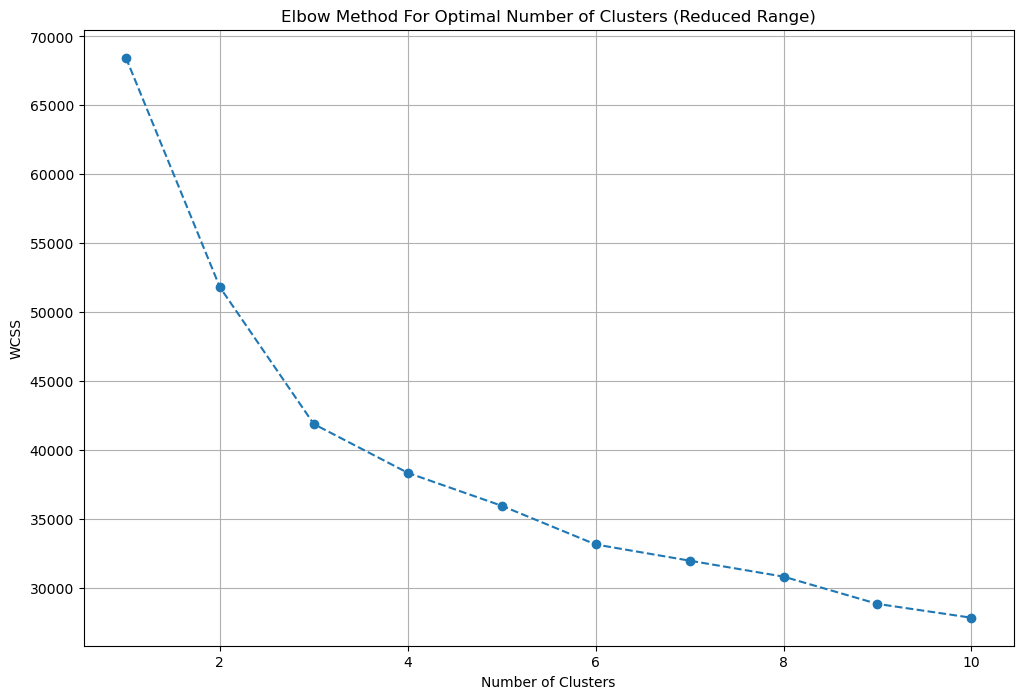

In [125]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [127]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [129]:
df = df.iloc[:,:-18]

In [131]:
df['furnishing_type'] = cluster_assignments

In [133]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
2038,NaN,0
3096,[],0
650,"['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
2674,"['5 Fan', '5 Light', '4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
2595,NaN,0


## 5.features

In [136]:
df[['society','features']].sample(5)

,society,features
579,ss radiance residency,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
3454,indiabulls centrum park,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2775,house number b-34,NaN
3316,dlf new town heights,"['Lift(s)', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2988,bestech park view spa next,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [138]:
df['features'].isnull().sum()

635

In [140]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [142]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [144]:
temp_df = df[df['features'].isnull()]

In [146]:
temp_df.shape

(635, 26)

In [148]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [150]:
df.loc[temp_df.index,'features'] = x.values

In [154]:
df['features'].isnull().sum()

481

In [158]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [160]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [162]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
1872,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
2557,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1590,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3266,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [164]:
features_binary_df.shape

(3803, 130)

In [166]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

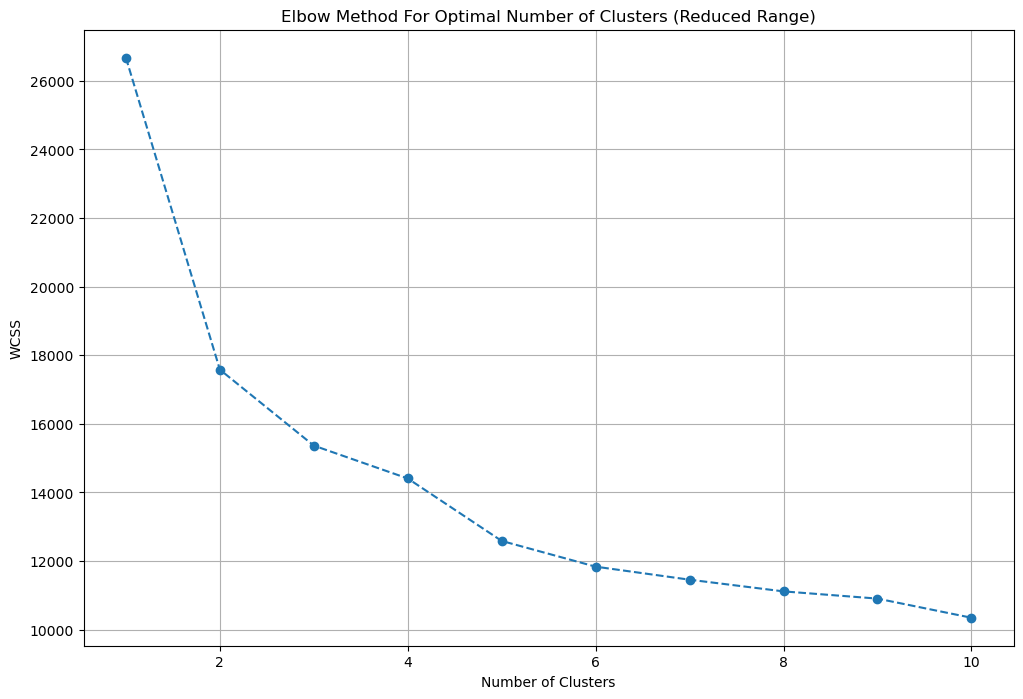

In [167]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [170]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [172]:
df['luxury_score'] = luxury_score

In [174]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,dlf regal gardens,sector 90,1.30,7150.0,1818.0,Super Built up area 1818(168.9 sq.m.)Built Up area: 1700 sq.ft. (157.94 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,3,3+,not available,7.0,South,Relatively New,"['SS Omnia, Sector 86', 'Numberdar market, IMT Manesar', ""Sodhi's Supermarket, Sector 82"", 'RPS International School', 'RHM Public School', 'ICICI Bank ATM, Sector 86', 'Silver Streak Multi Speciality', 'Aarvy Healthcare Super Speciality', 'Miracles Apollo Cradle Hospital', 'HDFC Bank, Pataudi Rd', 'Canara Bank - Nawada Fatehpur', 'State Bank of India', 'Minda Industries Nawada Fatehpur', 'Holiday Inn Gurugram Sector 90', 'M3M SCO Shop cum Office']",NaN,"['Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1818.0,1700.0,1400.0,0,0,0,0,0,0,"[Water purifier, Security / Fire Alarm, Power Back-up, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, No open drainage around, Piped-gas, Internet/wi-fi connectivity, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",141
1,flat,tata primanti,sector 72,3.25,10545.0,3082.0,Super Built up area 3300(306.58 sq.m.),3,3,3,servant room,2.0,South,Moderately Old,"['Sector 55-56 Metro Station', 'Omaxe City Centre', 'Sohna Gurgaon Road', 'Faridabad Gurgaon Road', 'Pallavan PreSchool, Sohna Road', 'RBSM Public school', 'Polaris Hospital', 'Spaze Itech Park', 'Radisson Hotel Gurugram Sohna Road', 'SkyJumper Trampoline Park Gurgaon']",NaN,"['Centrally Air Conditioned', 'High Ceiling Height', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Swimming Pool', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",3300.0,NaN,NaN,0,1,0,0,0,0,"[Centrally Air Conditioned, High Ceiling Height, Separate entry for servant room, No open drainage around, Piped-gas, Swimming Pool, Security Personnel, Natural Light, Internet/wi-fi connectivity, Airy Rooms, Low Density Society, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center, Water softening plant]",94
2,flat,ramprastha the edge towers,sector 37d,0.80,5797.0,1380.0,Super Built up area 1380(128.21 sq.m.)Built Up area: 1300 sq.ft. (120.77 sq.m.)Carpet area: 1200 sq.ft. (111.48 sq.m.),2,2,3,not available,2.0,North-East,Relatively New,"['MDS Public School', 'St Pauls School', 'Suncity School', 'Hanuman & Shani Mandir', 'IndusInd Bank ATM', 'SGT UHTC Basai', 'K.D. Hospital', 'CANARA BANK', 'State Bank of India', 'Basai Enclave Park', 'Ramprastha Police Post', 'Taxila cricket ground', 'Bharat Singh fuel company', 'Edge towers tennis court', 'KFG Sports Club']","['5 Fan', '2 Geyser', '7 Light', '2 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen'

In [176]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [178]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1202,flat,ats tourmaline,sector 109,1.40,8000.0,1750.0,Super Built up area 1750(162.58 sq.m.),3,3,3+,12.0,North-West,Relatively New,1750.0,NaN,NaN,0,0,0,0,1,0,65
936,flat,godrej summit premia towers,sector 104,0.90,7149.0,1259.0,Built Up area: 1259 (116.96 sq.m.),2,2,0,16.0,NaN,Undefined,NaN,1259.0,NaN,0,0,0,0,0,0,0
726,flat,shree vardhman flora,sector 90,0.95,6333.0,1500.0,Carpet area: 1500 (139.35 sq.m.),3,3,3,9.0,South-East,Relatively New,NaN,NaN,1500.0,0,1,0,0,0,0,90
15,flat,signature andour heights,sector 71,0.60,10000.0,600.0,Super Built up area 600(55.74 sq.m.)Carpet area: 514 sq.ft. (47.75 sq.m.),2,2,1,5.0,South-West,Relatively New,600.0,NaN,514.0,0,0,0,1,0,0,59
695,flat,tulip violet,sector 69,1.19,8814.0,1350.0,Carpet area: 1350 (125.42 sq.m.),2,3,1,0.0,West,Relatively New,NaN,NaN,1350.0,1,0,0,0,0,1,174


In [180]:
df.shape

(3803, 23)

In [182]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)